In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
data=pd.read_csv(r'C:\Users\sreer\Downloads\Week_8_Q&A_dataset - Sheet1.csv')

In [3]:
data.head()

,Gender,Test preparation,Total Marks
0,male,none,14
1,female,none,28
2,female,none,18
3,female,none,48
4,female,none,21


In [16]:
print(data['Gender'].value_counts())
print(data['Test preparation'].value_counts())

female    16
male      12
Name: Gender, dtype: int64
none         21
completed     7
Name: Test preparation, dtype: int64


In [5]:
data.shape

(28, 3)

In [6]:
data.isna().sum()

Gender              0
Test preparation    0
Total Marks         0
dtype: int64

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Gender            28 non-null     object
 1   Test preparation  28 non-null     object
 2   Total Marks       28 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 800.0+ bytes


In [8]:
data.describe()

,Total Marks
count,28.000000
mean,32.321429
std,12.454520
min,12.000000
25%,22.500000
50%,33.000000
75%,43.250000
max,50.000000


In [9]:
data.describe(include='object')

,Gender,Test preparation
count,28,28
unique,2,2
top,female,none
freq,16,21


In [10]:
data.sort_values(by='Total Marks',ascending=True)
data.sort_index(inplace=False)

,Gender,Test preparation,Total Marks
0,male,none,14
1,female,none,28
2,female,none,18
3,female,none,48
4,female,none,21
5,female,completed,40
6,male,none,30
7,female,none,12
8,male,none,18
9,male,none,24


<AxesSubplot:xlabel='Gender'>

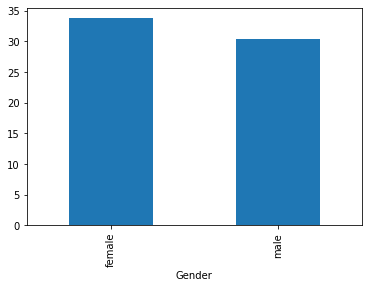

In [11]:
data.groupby('Gender')['Total Marks'].mean().plot.bar()

<AxesSubplot:xlabel='Test preparation'>

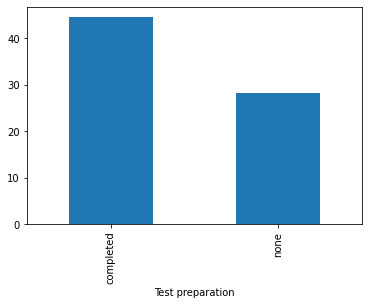

In [12]:
data.groupby('Test preparation')['Total Marks'].mean().plot.bar()

array([<AxesSubplot:title={'center':'completed'}>,
       <AxesSubplot:title={'center':'none'}>], dtype=object)

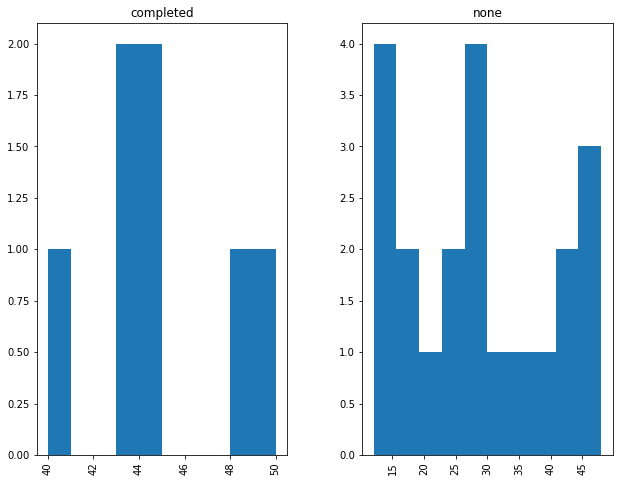

In [13]:
data.hist(by='Test preparation',column=['Total Marks'],figsize=(10,8))

array([<AxesSubplot:title={'center':'female'}>,
       <AxesSubplot:title={'center':'male'}>], dtype=object)

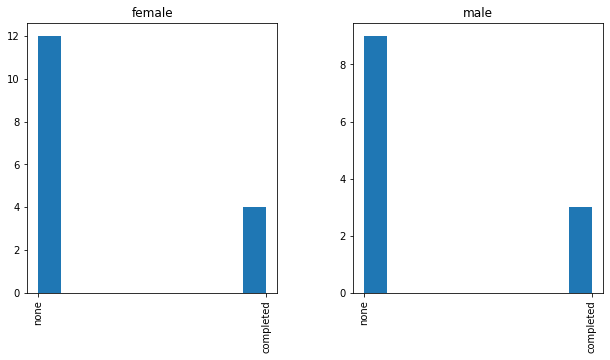

In [14]:
data.hist(by='Gender',column='Test preparation',figsize=(10,5))

## 2.Check whether female and male students scored the same marks.


In [18]:
from scipy import stats


In [39]:
female_score=data[data['Gender']=='female']['Total Marks']
male_score=data[data['Gender']=='male']['Total Marks']
ttest,pvalue=stats.ttest_ind(female_score,male_score)
print("P value is :",pvalue)
print("Test statistic is:",ttest)

if pvalue< 0.05:
    print ('Reject null hypothesis')
else:
    print("failed to reject null hypothesis")

P value is : 0.4937822317960763
Test statistic is: 0.6940885268848668
failed to reject null hypothesis


## Findings:-
#### Null Hypothesis is  there are  females and male students who scored the same marks,since p-value is greater than 0.05 ,the alpha value,we failed to reject the null hypothesis and conclude that there are female and male students who scored the same marks.

## 3. Whether test preparation helps the students?

In [37]:
prep_completed=data[data['Test preparation']=='completed']['Total Marks']
prep_not_completed=data[data['Test preparation']=='none']['Total Marks']
ttest,pvalue=stats.ttest_ind(prep_completed,prep_not_completed,alternative='greater')
print("P value is :",pvalue)
print("Test statistic is:",ttest)
if pvalue< 0.05:
    print ('Reject null hypothesis')
else:
    print("failed to reject null hypothesis")

P value is : 0.0006335646228660053
Test statistic is: 3.6143637527769217
Reject null hypothesis


## Findings:-
#### Null hypothesis was  mark scored by students completed testprep<= mark scored by students  not completed testprep.Here the obtained p-value is 0.000633 which was less than 0.05 we reject the null hypothesis and conclude that students who completed test preparation scored more than students not attended the test preparation course